In [1]:
import red_neuronal as NN
import data

In [2]:
# Obteniendo Datos
entradas_entrenamiento, salidas_entrenamiento = data.datos_entrenamiento()
entradas_validacion, salidas_validacion = data.datos_validacion()
entradas_testeo, salidas_testeo = data.datos_testeo()

print("Cantidad a entrenar: ", len(entradas_entrenamiento))
print("Cantidad a validar: ", len(entradas_validacion))
print("Cantidad a testear: ", len(entradas_testeo))

# Creando Capas
capa_entrada = NN.Capa(784)
capa_oculta1 = NN.Capa(2, NN.Ponderacion, NN.Sigmoide)
capa_oculta2 = NN.Capa(2, NN.Ponderacion, NN.Relu)
capa_oculta3 = NN.Capa(2, NN.Ponderacion, NN.Sigmoide)
capa_oculta4 = NN.Capa(2, NN.Ponderacion, NN.Tanh)
capa_salida = NN.Capa(1, NN.Ponderacion, NN.Sigmoide)

# Creando Red con Capas
red_neuronal = NN.RedNeuronal(
    capa_entrada,
    capa_oculta1,
    capa_oculta2,
    capa_oculta3,
    capa_oculta4,
    capa_salida
)
# print(red_neuronal)

# Entrenando Red
entrenamiento = NN.Entrenamiento(
    entradas_entrenamiento,
    (entradas_validacion, salidas_validacion),
    salidas_entrenamiento,
    red_neuronal,
    epocas=30,
    tasa_aprendizaje=0.5
)
entrenamiento.entrenar_red()
# red_neuronal.printear_red()

Cantidad a entrenar:  300
Cantidad a validar:  50
Cantidad a testear:  50


ultimo error:  0.12530360611061656


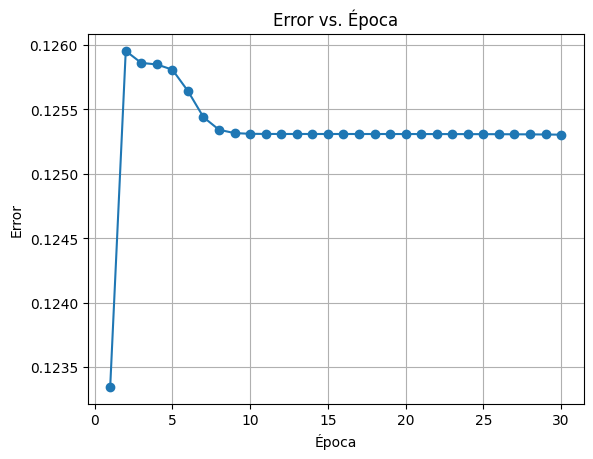

In [3]:
entrenamiento.perdida_vs_epoca()

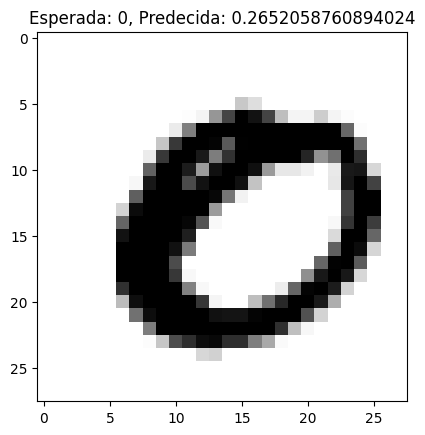

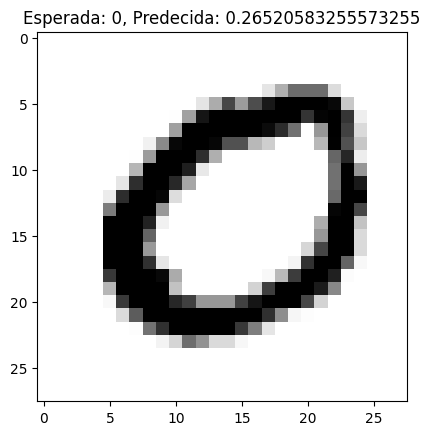

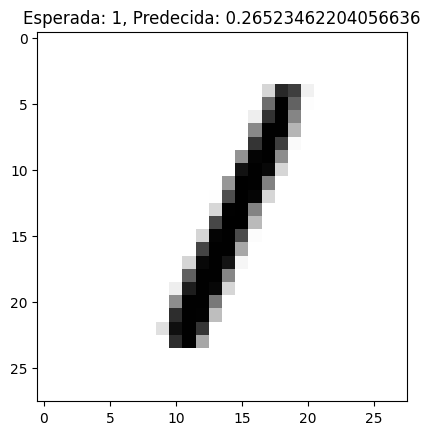

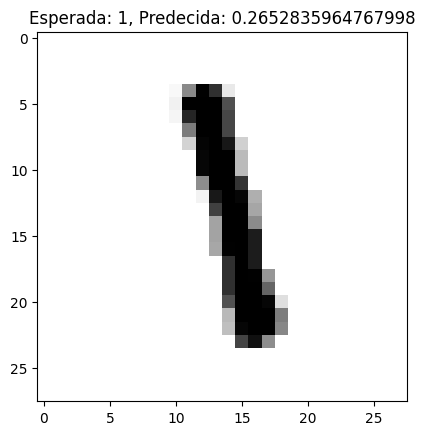

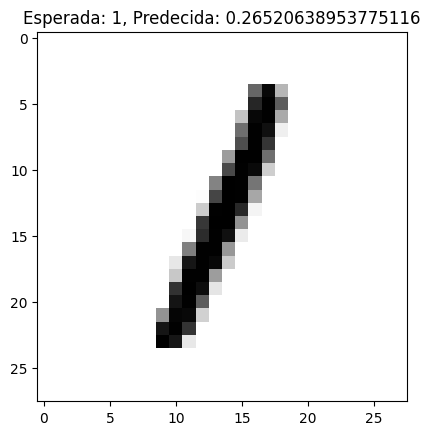

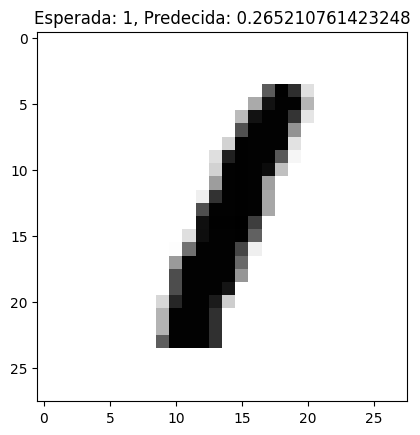

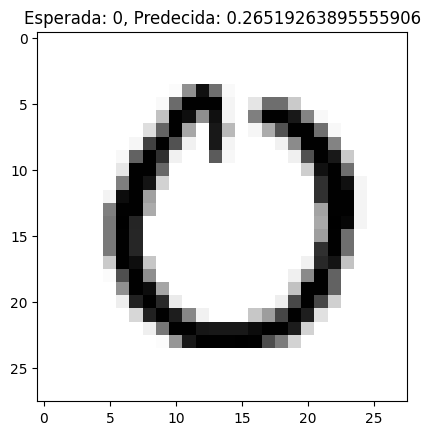

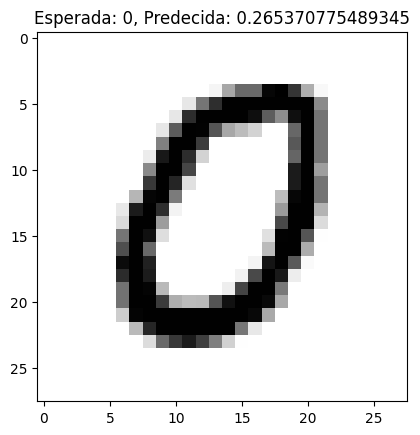

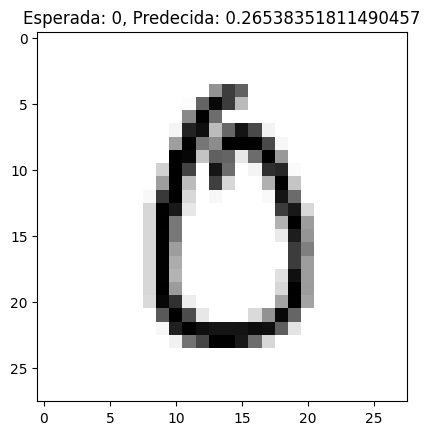

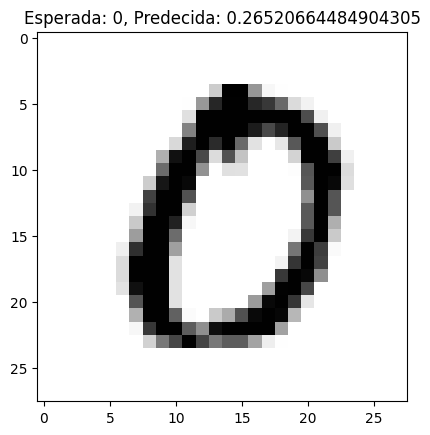

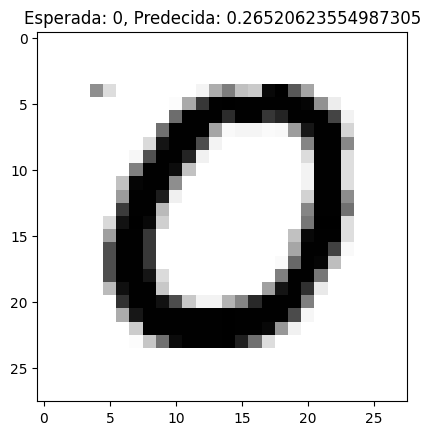

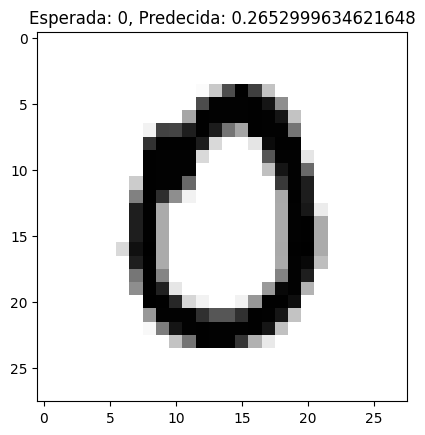

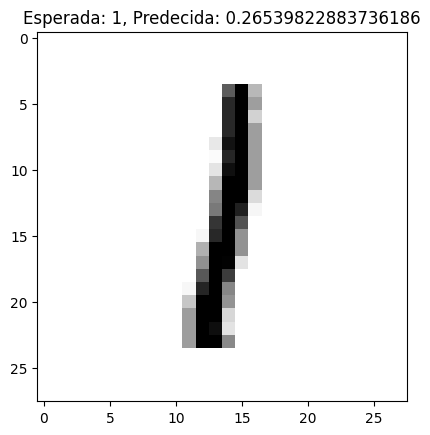

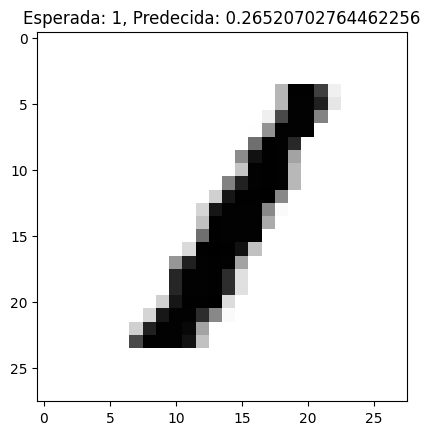

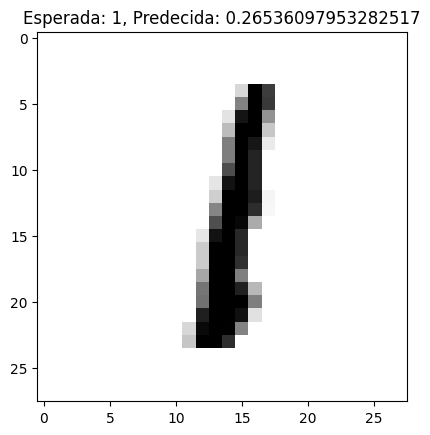

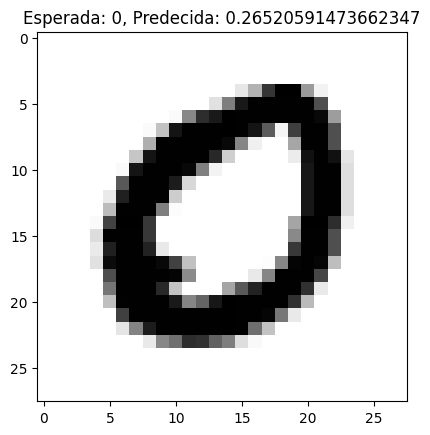

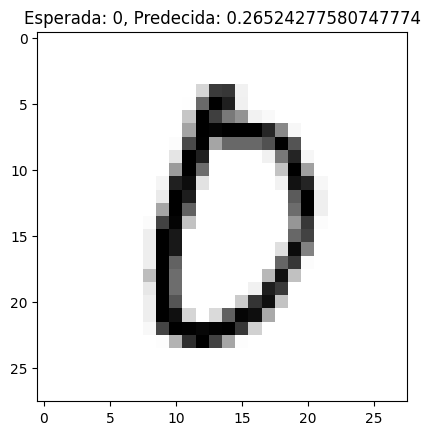

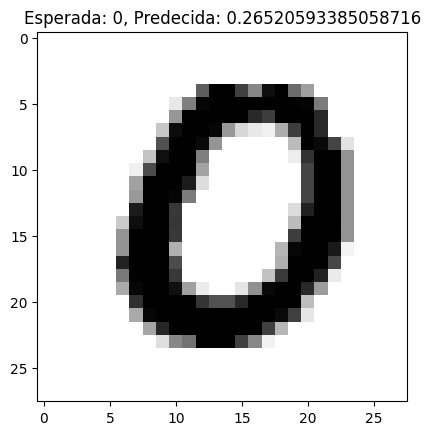

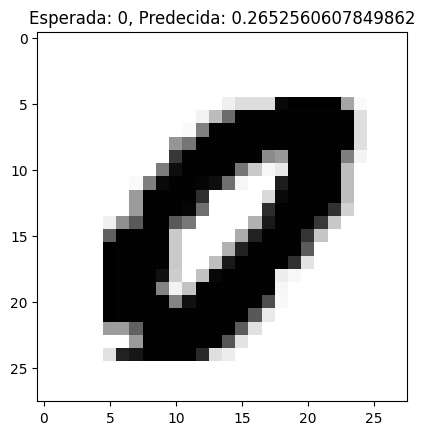

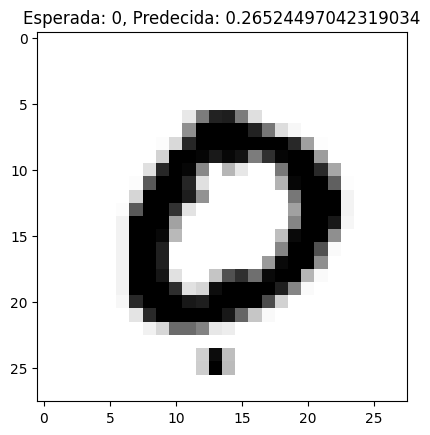

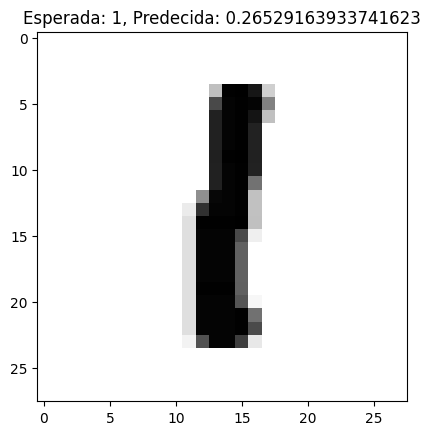

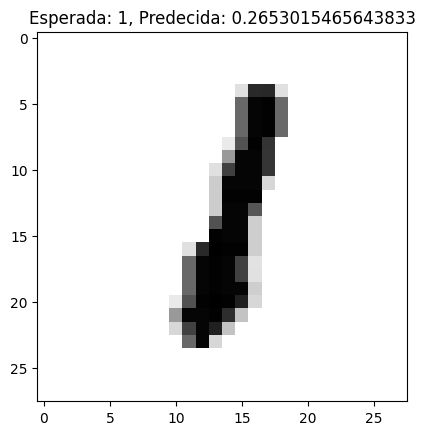

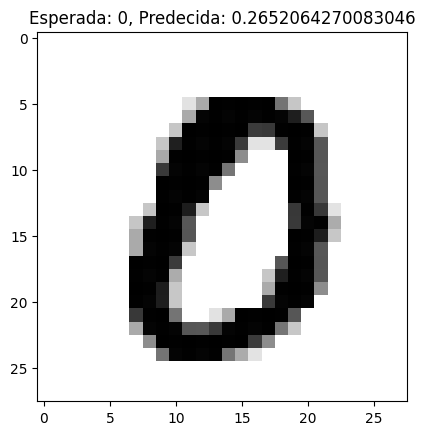

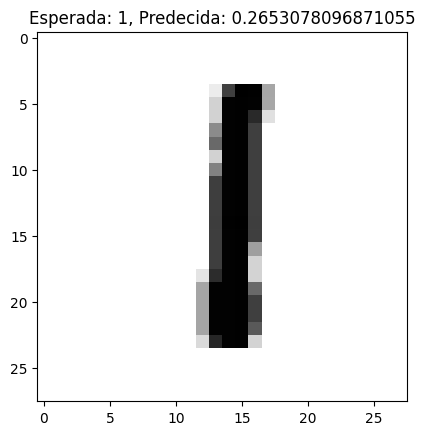

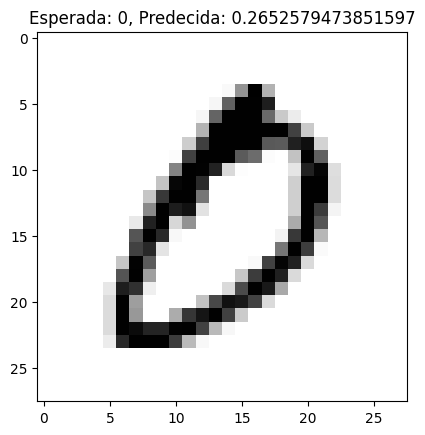

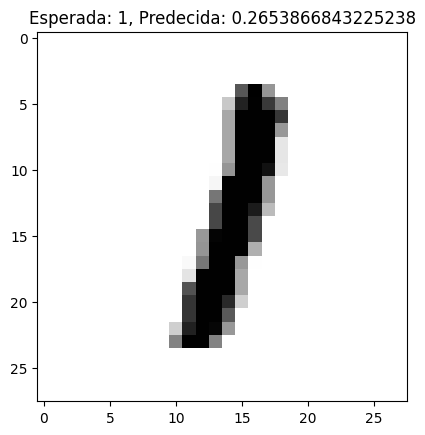

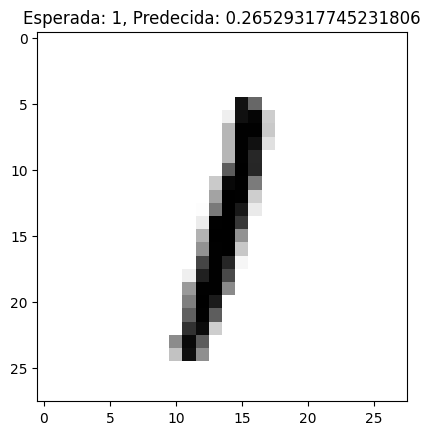

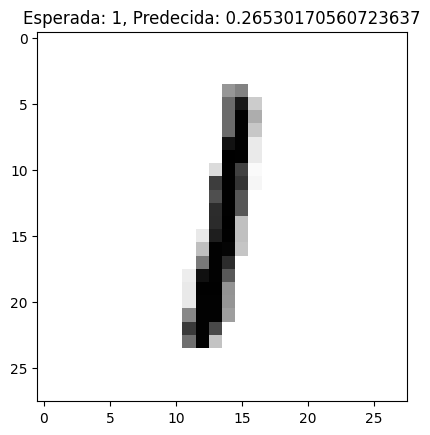

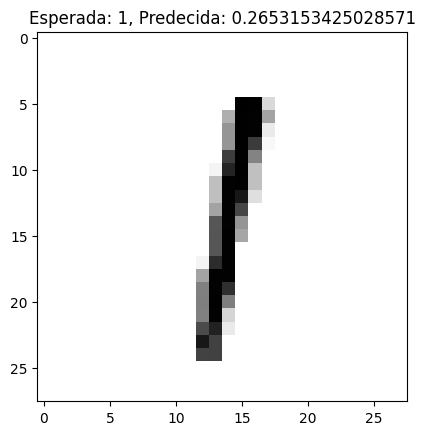

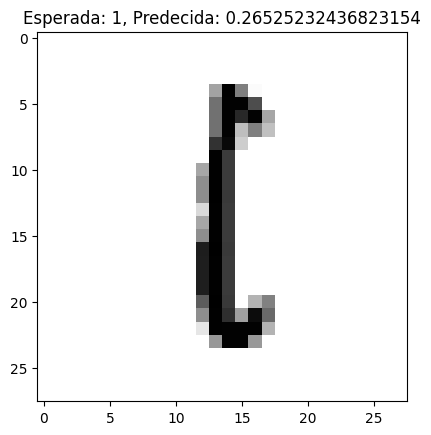

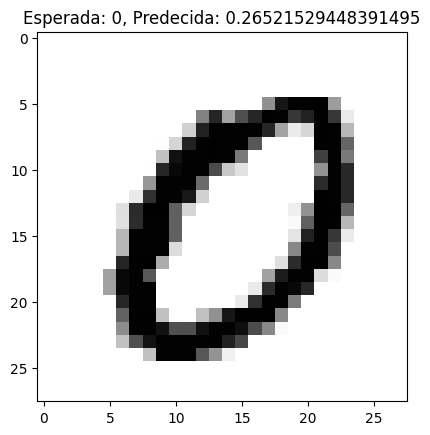

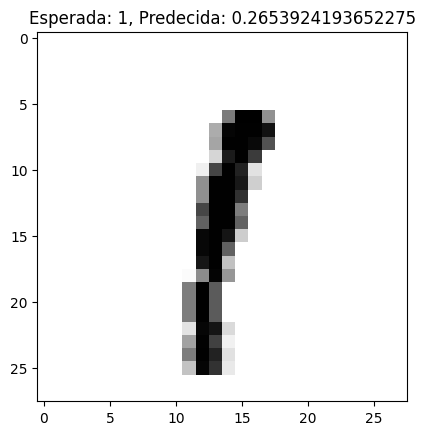

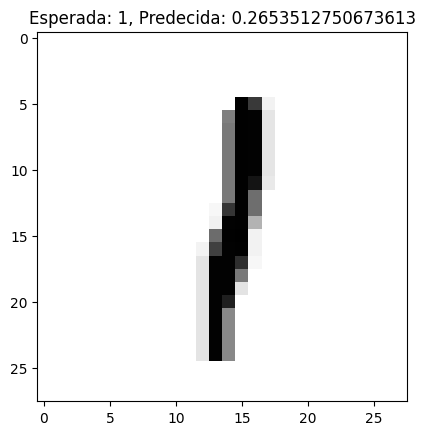

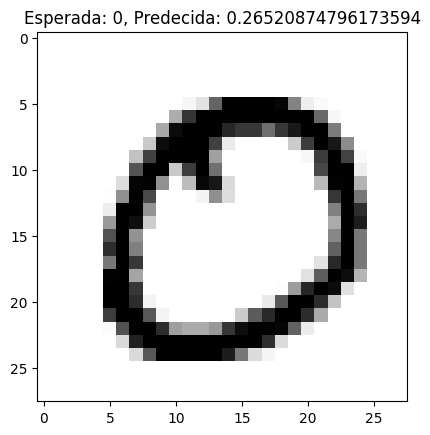

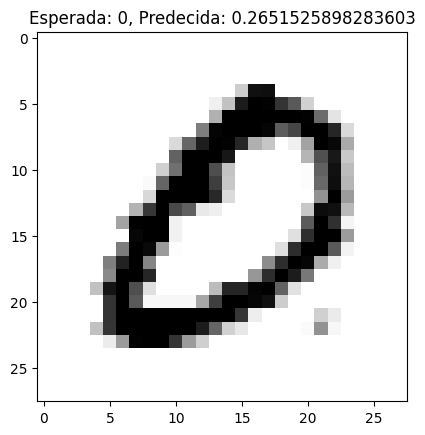

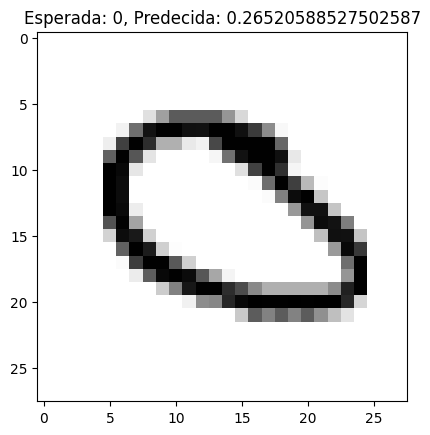

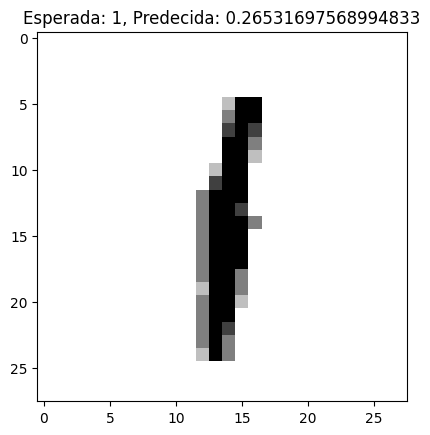

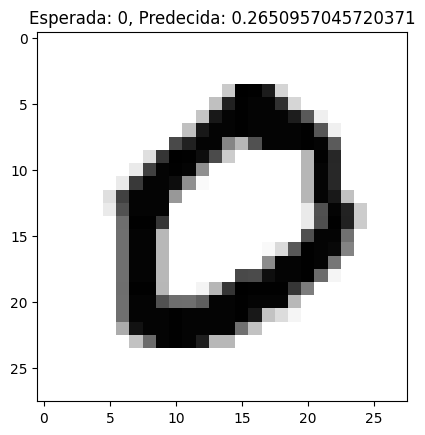

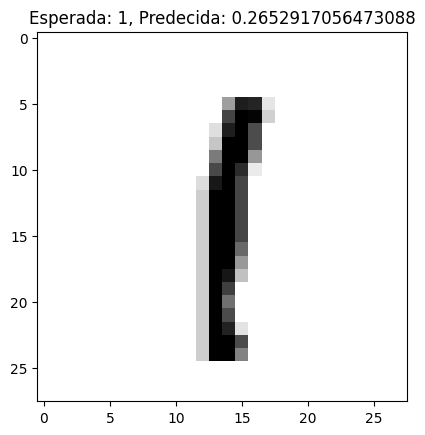

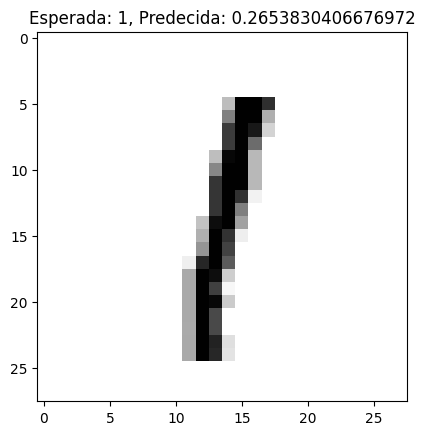

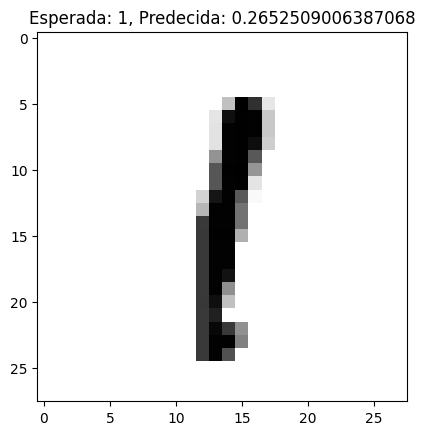

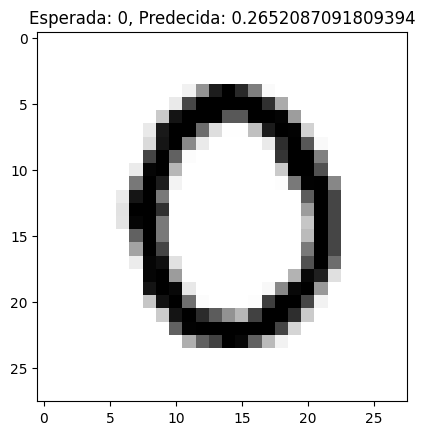

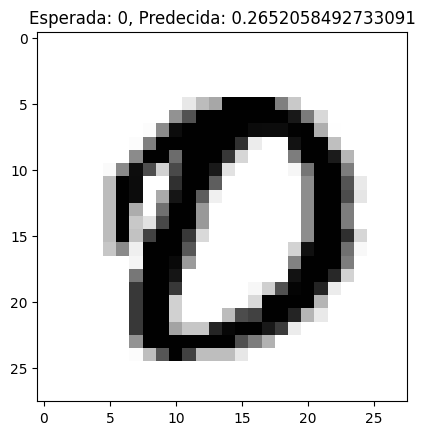

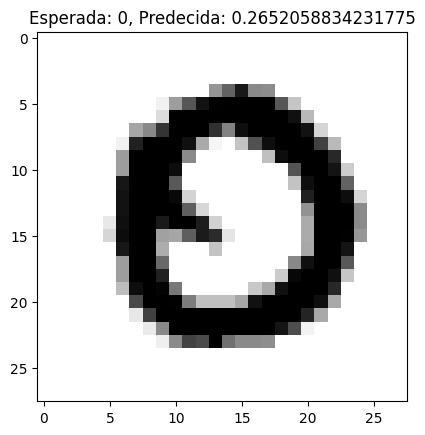

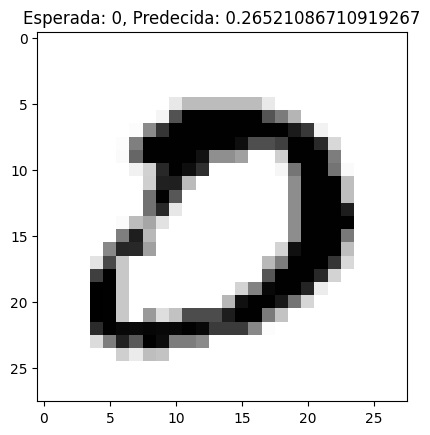

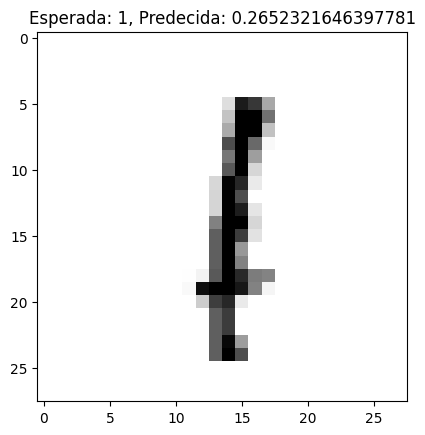

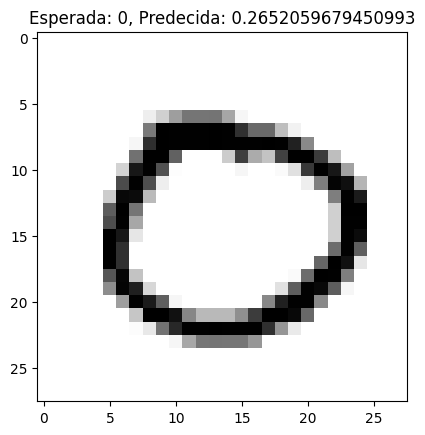

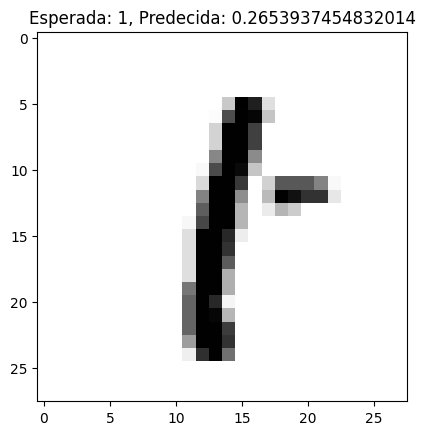

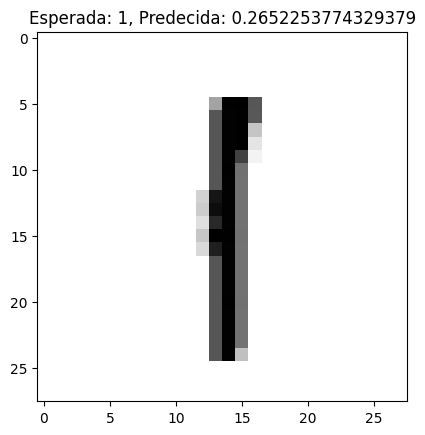

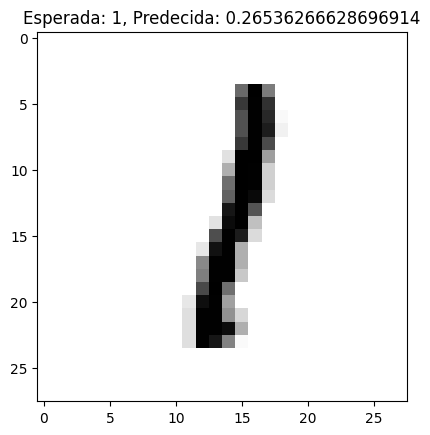

In [4]:
cont_accepted = 0
for index in range(len(entradas_testeo)):
    result = red_neuronal.propagacion_adelante(
        NN.np.reshape(entradas_testeo[index], (784,1))
    )
    esperada = salidas_testeo[index][0]
    salida = result["salida_red"][0][0]
    data.dibujar_una_imagen(
        entradas_testeo[index],
        esperada,
        salida
    )
    if esperada == round(salida):
        cont_accepted += 1

In [5]:
print("Coverage:")
print((cont_accepted/len(salidas_testeo)) * 100, "%")

Coverage:
50.0 %
